# Python script to read the shapefile data and visualize countries touching/intersecting India using geopandas 

Mounting Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing required libraries

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gdal as g
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data

In [ ]:
countries = gpd.read_file('/content/drive/MyDrive/GeoSnips/T2/countries.geojson')
countries.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [ ]:
print('Total number of countries: ', countries.shape[0])

Total number of countries:  255


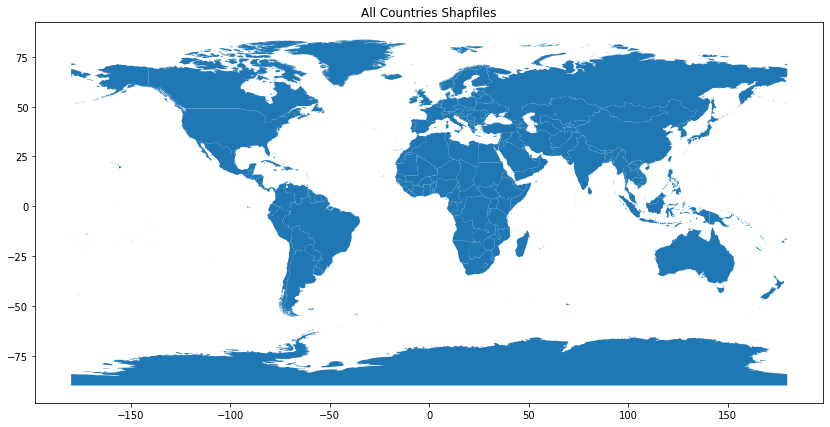

In [ ]:
countries.plot(figsize = (17, 7))
plt.title("All Countries' Shapfiles")
plt.show()

extracting India's Shapefile and displaying

Text(0.5, 1.0, 'India Shapefile')

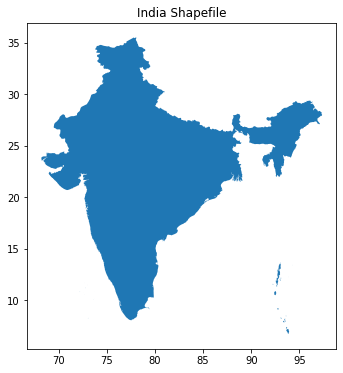

In [ ]:
india = countries.loc[countries['ADMIN'] == 'India']
india.plot(figsize = (15, 6))
plt.title('India Shapefile')

finding neighboring (touching and/or intersecting) countries of a country 

In [ ]:
for i, row in countries.iterrows():  
    touching = countries[countries.geometry.touches(row['geometry'])].ADMIN.tolist()
    intersecting = countries[countries.geometry.overlaps(row['geometry'])].ADMIN.tolist()
    countries.at[i, "Touching"] = ", ".join(touching)
    countries.at[i, "Intersecting"] = ", ".join(intersecting)

In [ ]:
india_neighboring = countries.loc[countries['ADMIN'] == 'India']
touching = list(india_neighboring['Touching'])
touching = touching[0].split(', ')
intersecting = list(india_neighboring['Intersecting'])
intersecting = intersecting[0].split(', ')
touching.extend(intersecting)
neighboring = touching
print("India's neighboring cocuntries (or regions) that are touching and/or intersecting India - ", neighboring)

India's neighboring cocuntries (or regions) that are touching and/or intersecting India -  ['Bangladesh', 'Bhutan', 'China', 'Myanmar', 'Pakistan', 'Siachen Glacier', 'Nepal']


In [ ]:
india_neighboring_countries = []
for i in range(len(neighboring)):
  india_neighboring_countries.append(countries.loc[countries['ADMIN'] == neighboring[i]])

india_neighboring1 = pd.concat([india_neighboring_countries[0], india_neighboring_countries[1], india_neighboring_countries[2], india_neighboring_countries[3], india_neighboring_countries[4], india_neighboring_countries[5], india_neighboring_countries[6]], axis = 0)
india_neighboring1.drop(['Touching', 'Intersecting'], axis = 1, inplace = True) 

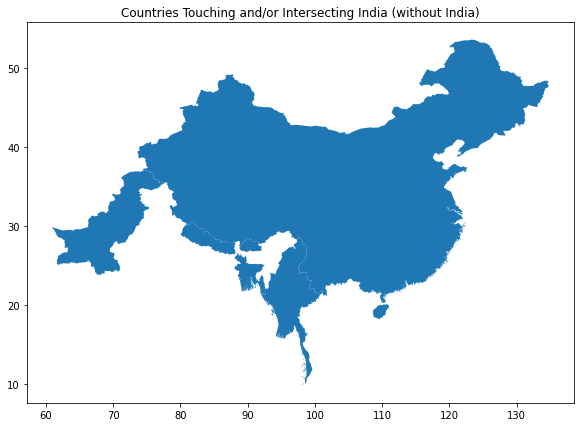

In [ ]:
india_neighboring1.plot(figsize = (17, 7))
plt.title('Countries Touching and/or Intersecting India (without India)')
plt.show()

In [ ]:
india_neighboring_countries.append(countries.loc[countries['ADMIN'] == 'India'])
india_neighboring2 = pd.concat([india_neighboring_countries[0], india_neighboring_countries[1], india_neighboring_countries[2], india_neighboring_countries[3], india_neighboring_countries[4], india_neighboring_countries[5], india_neighboring_countries[6], india_neighboring_countries[7]], axis = 0)
india_neighboring2.drop(['Touching', 'Intersecting'], axis = 1, inplace = True) 

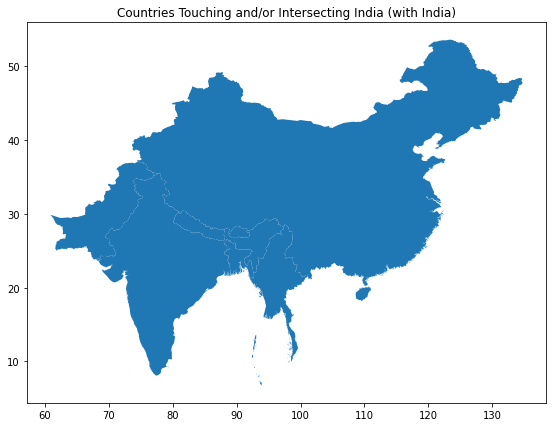

In [ ]:
india_neighboring2.plot(figsize = (17, 7))
plt.title('Countries Touching and/or Intersecting India (with India)')
plt.show()